**IMPORT REQUIRED LIBRARIES:**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**LOAD THE DATASET:**
https://drive.google.com/file/d/1jOKpFtG5c5a_DSTpgDBvgm5u3SRVajGn/view?usp=sharing (mental_disease_data)
https://drive.google.com/file/d/1KXZoVo1bOWNXSnSvkd7n3NkmLJtwNECI/view?usp=sharing (substance_use_data)

In [ ]:
mental_disease_data=pd.read_csv("/content/mental-and-substance-use-as-share-of-disease -AI.csv") #PATH TO THE FILE
substance_use_data=pd.read_csv("/content/prevalence-by-mental-and-substance-use-disorder _AI.csv") #ADD PATH TO THE FILE

**Viewing the first few rows of a DataFrame in Pandas**

In [ ]:
mental_disease_data.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [ ]:
substance_use_data.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


**DESCRIBING THE DATASET**

In [ ]:
mental_disease_data.describe(),mental_disease_data.info()
substance_use_data.describe(),substance_use_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839


(              Year  \
 count  6840.000000   
 mean   2004.500000   
 std       8.656074   
 min    1990.000000   
 25%    1997.000000   
 50%    2004.500000   
 75%    2012.000000   
 max    2019.000000   
 
        Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
 count                                        6840.000000                          
 mean                                            0.281167                          
 std                                             0.047561                          
 min                                             0.191621                          
 25%                                             0.255468                          
 50%                                             0.287456                          
 75%                                             0.304760                          
 max                                             0.506018                          
 
        Prevalence - Bipolar diso

**CONCATENATING THE TWO DATASETS HORIZONTALLY:**

In [ ]:
df=pd.concat(objs=[substance_use_data,mental_disease_data],axis=1)

**DATA VISUALIZATION:**

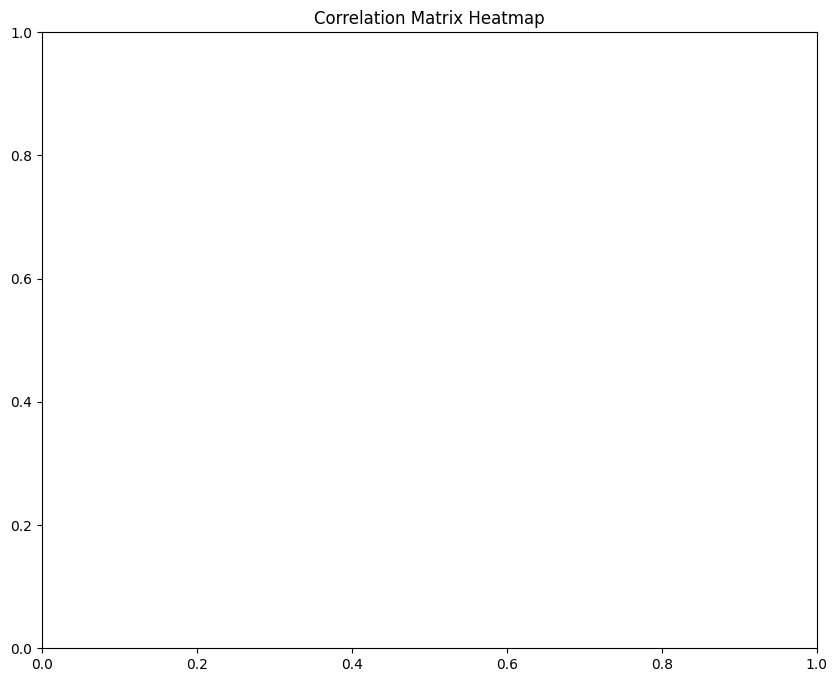

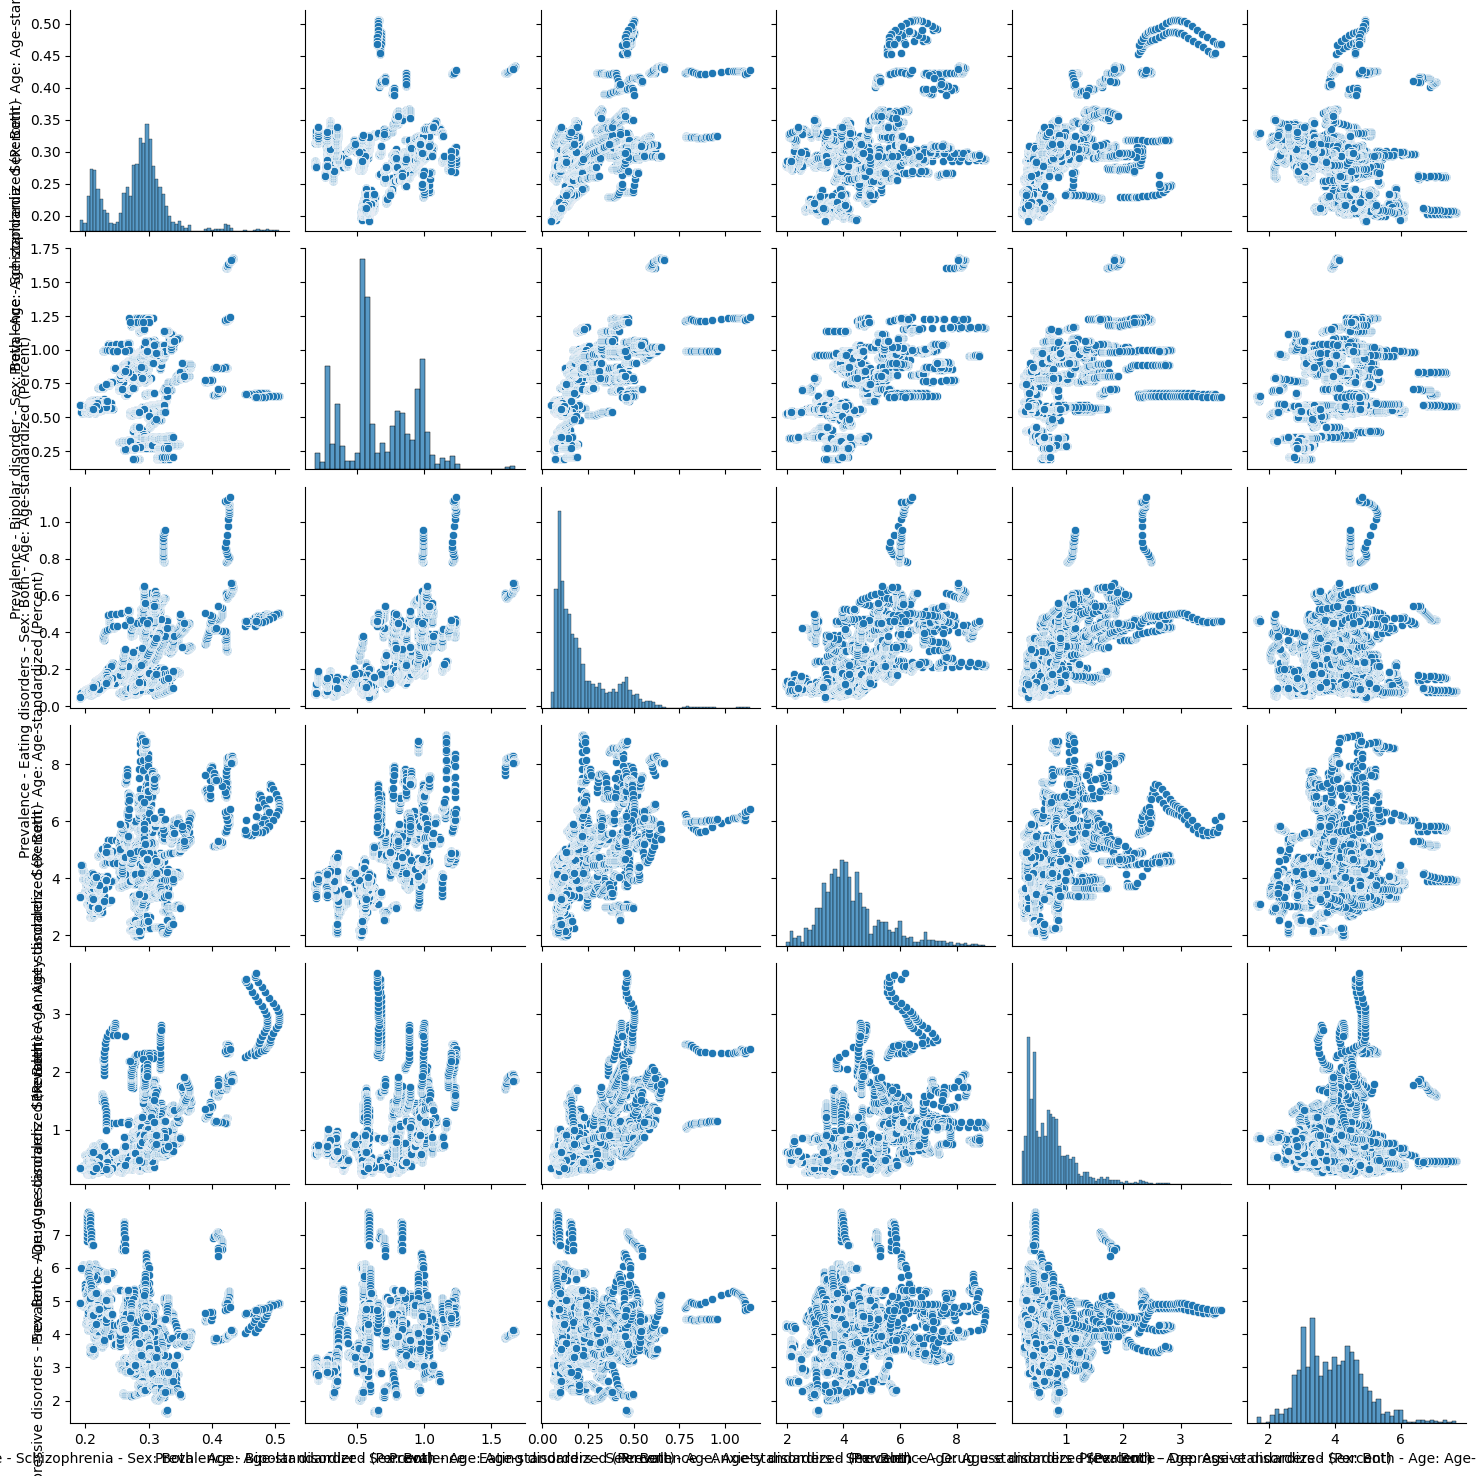

In [ ]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pair plot for visualizing relationships between selected columns
selected_columns = ['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
                    'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
                    'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
                    'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
                    'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
                    'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)']

sns.pairplot(df[selected_columns])
plt.show()

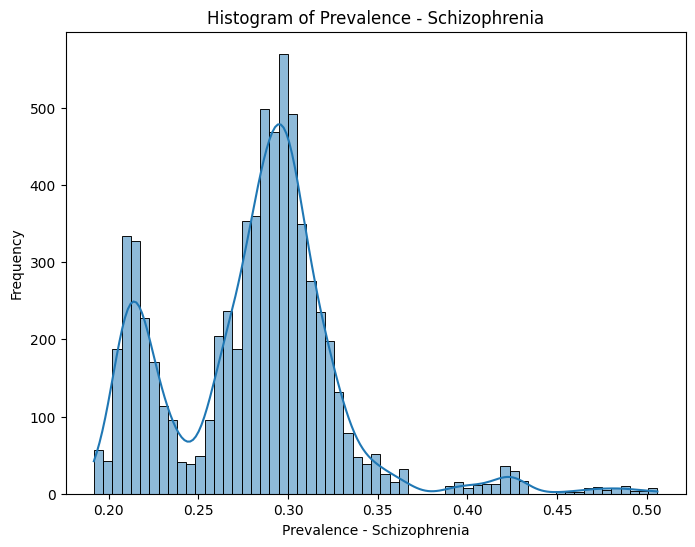

In [ ]:
# Histogram for a single column
plt.figure(figsize=(8, 6))
sns.histplot(df['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)'], kde=True)
plt.xlabel('Prevalence - Schizophrenia')
plt.ylabel('Frequency')
plt.title('Histogram of Prevalence - Schizophrenia')
plt.show()

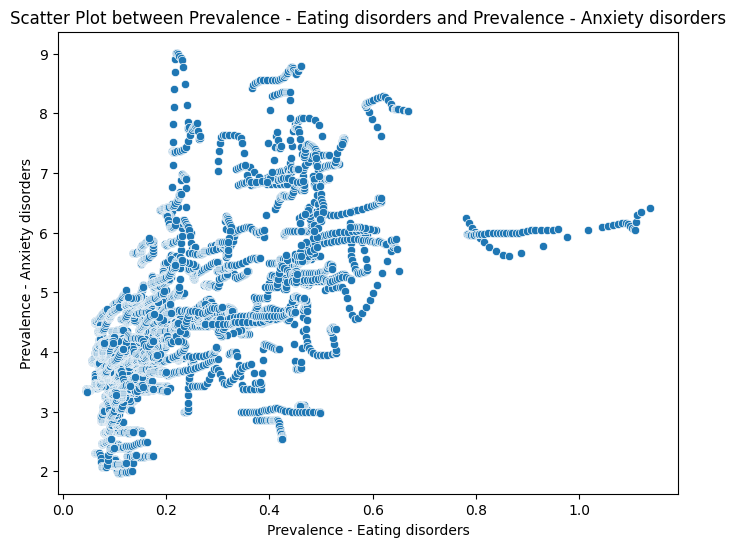

In [ ]:
# Scatter plot for two columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
                y='Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)', data=df)
plt.xlabel('Prevalence - Eating disorders')
plt.ylabel('Prevalence - Anxiety disorders')
plt.title('Scatter Plot between Prevalence - Eating disorders and Prevalence - Anxiety disorders')
plt.show()

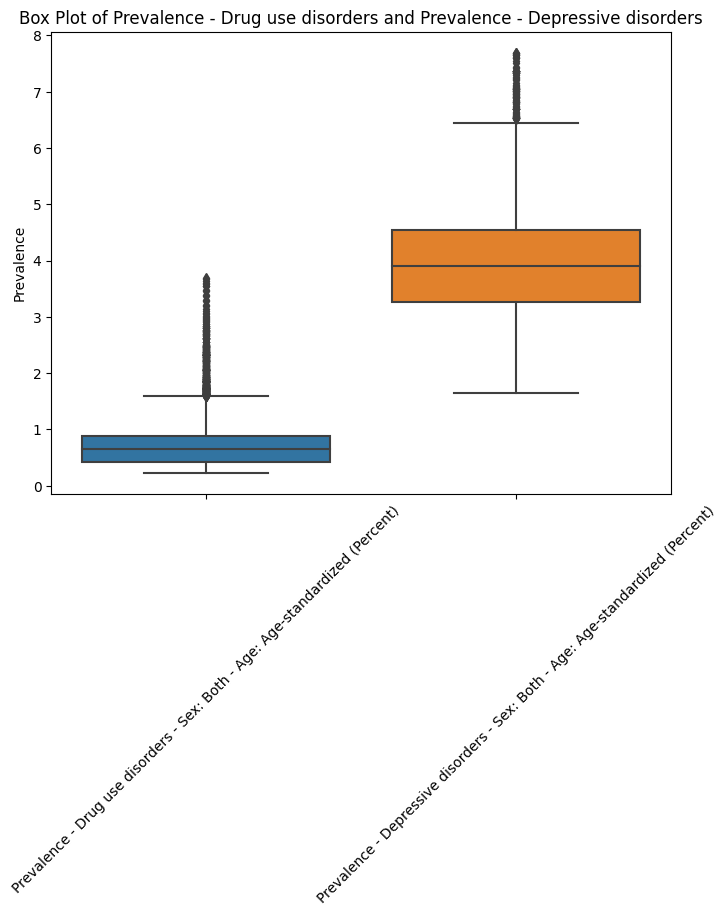

In [ ]:
# Box plot for multiple columns
selected_columns = ['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
                    'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[selected_columns])
plt.ylabel('Prevalence')
plt.title('Box Plot of Prevalence - Drug use disorders and Prevalence - Depressive disorders')
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-888b7a54debf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


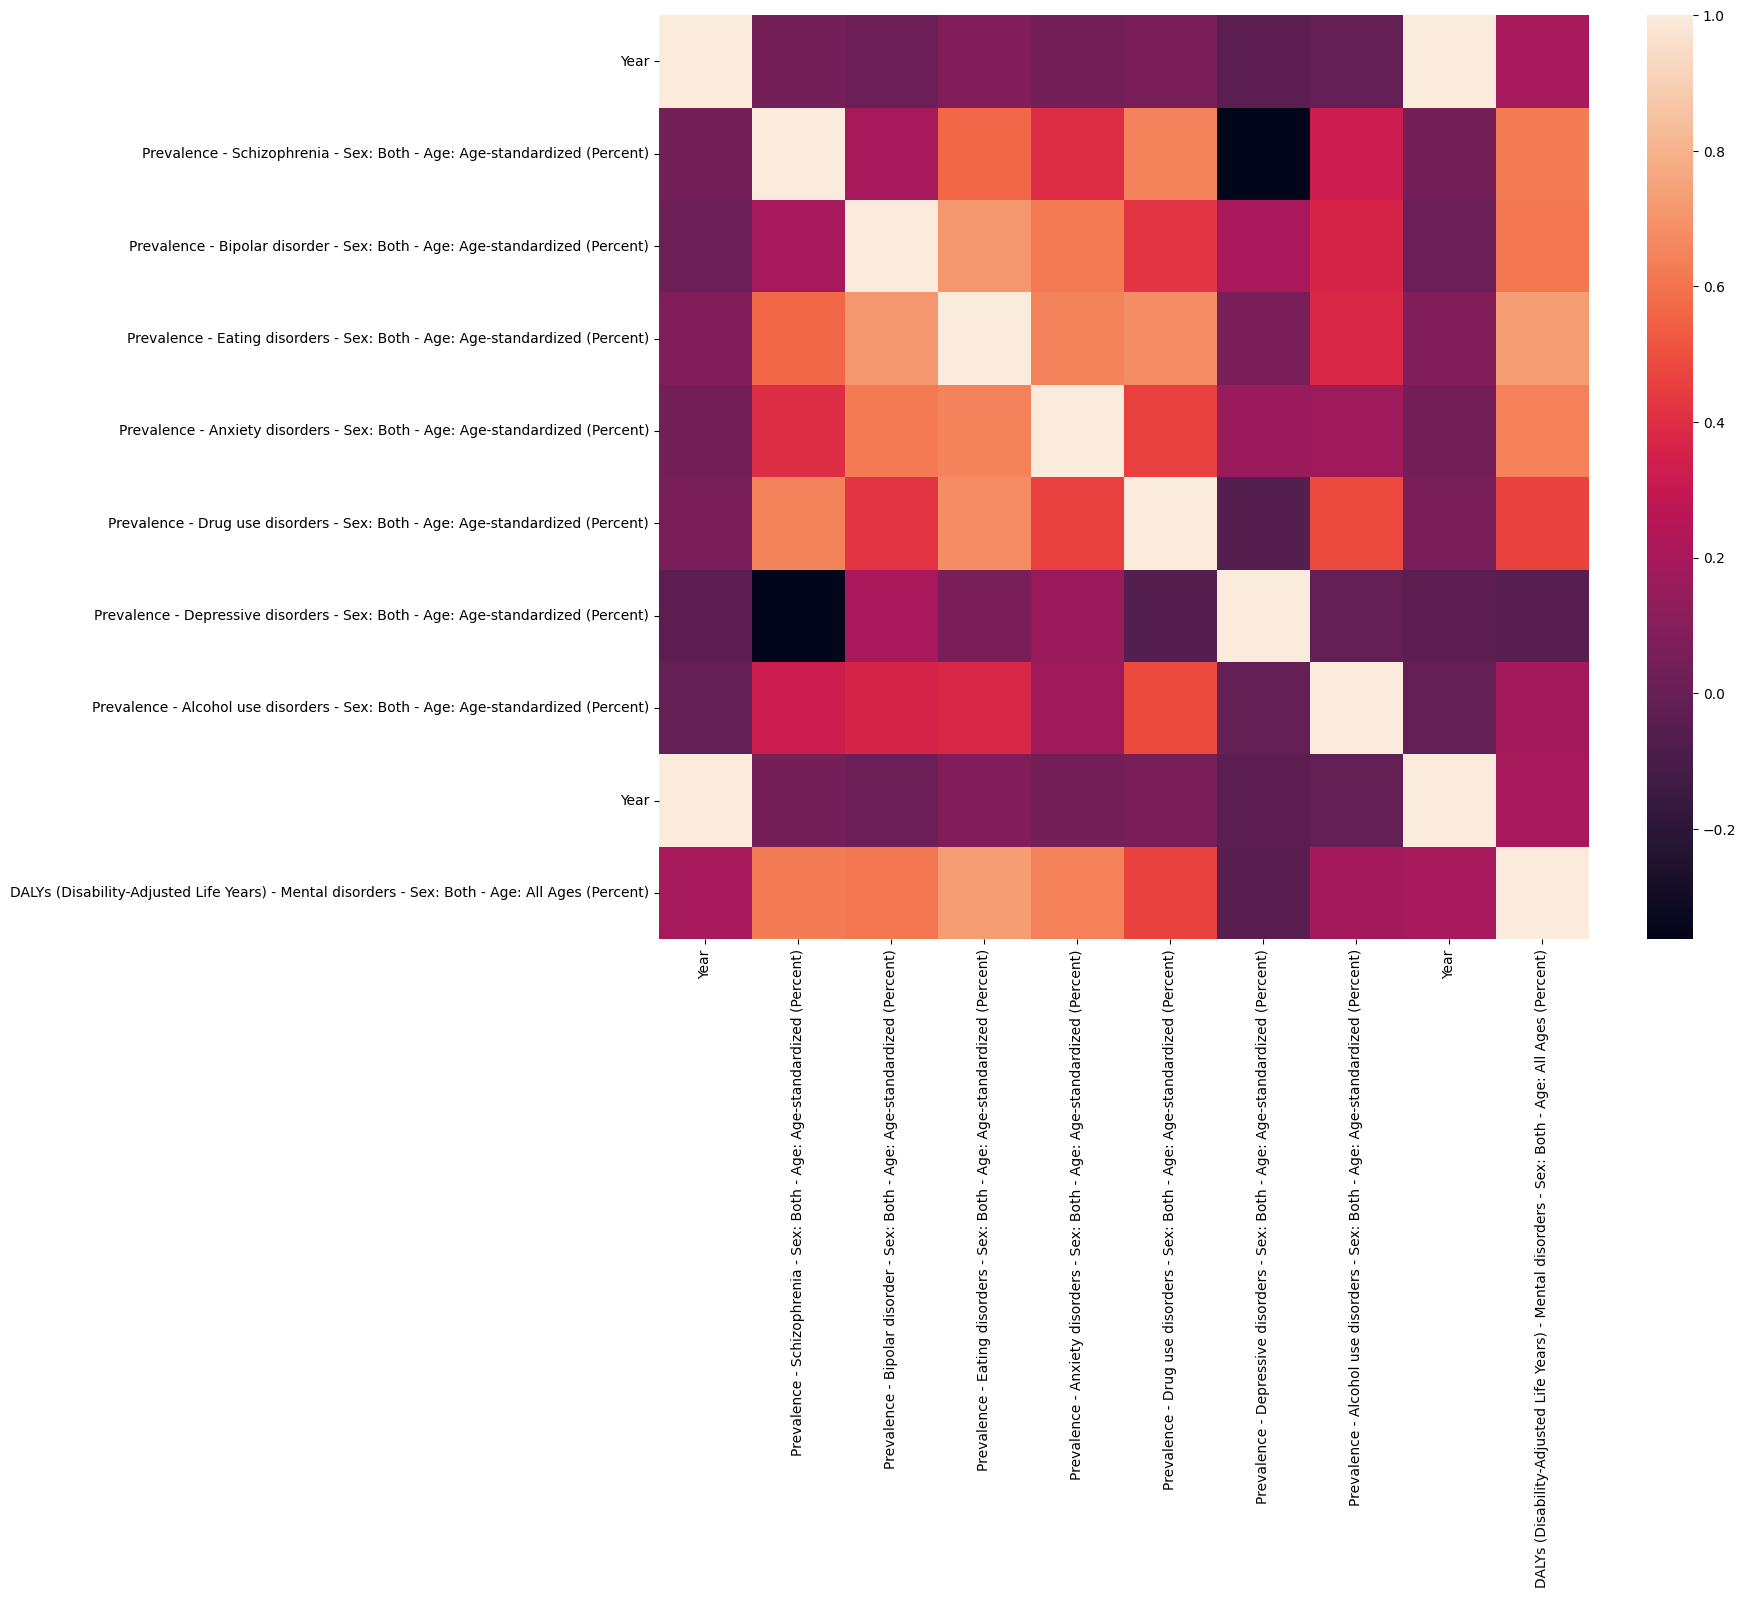

In [ ]:
# Calculate the correlation matrix
corr = df.corr(numeric_only=True)
# Set up the figure size for the heatmap
plt.figure(figsize=(15, 12))
# Plot the heatmap using Seaborn
sns.heatmap(corr)
# Display the plot
plt.show()

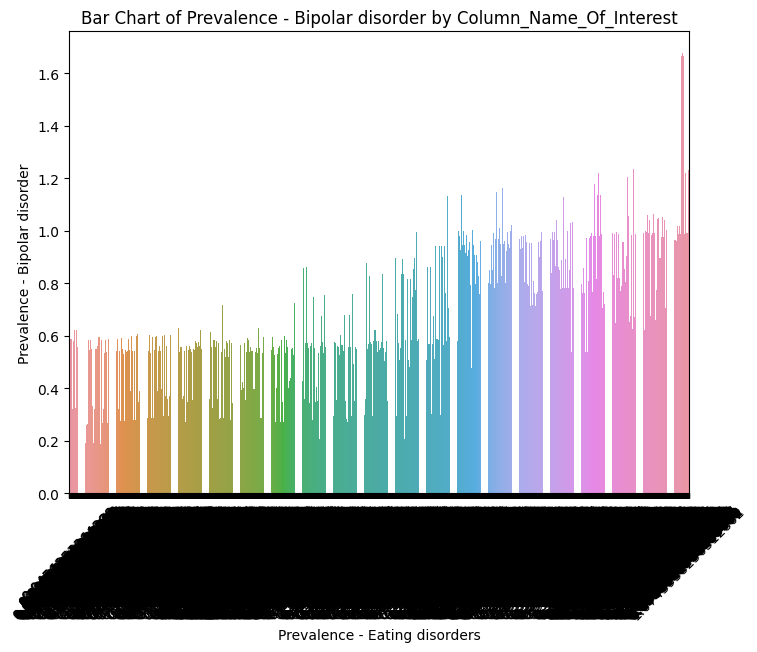

In [ ]:
# Bar chart for a single column
plt.figure(figsize=(8, 6))
sns.barplot(x='Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',  # Replace 'Column_Name_Of_Interest' with the actual column name
            y='Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
            data=df)
plt.xlabel('Prevalence - Eating disorders')  # Replace 'Column_Name_Of_Interest' with the actual column name
plt.ylabel('Prevalence - Bipolar disorder')
plt.title('Bar Chart of Prevalence - Bipolar disorder by Column_Name_Of_Interest')
plt.xticks(rotation=45)
plt.show()


**DATA PREPROCESSING:**

In [ ]:
#df.drop(['Entity','Code','Year'],axis=1,inplace=True)
df=df.fillna(df.mean())

x=df[['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',]].to_numpy()

y=df[['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']].to_numpy()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

<ipython-input-27-20bc13c9ced4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


**ML MODEL IMPLEMENTATION**

*Linear Regression*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded and preprocessed the data

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train.ravel())  # Convert y_train to a 1D array using ravel()

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (Coefficient of Determination) to measure the model's goodness of fit
r2 = r2_score(y_test, y_pred)

# Define success and failure thresholds (You can set these based on your specific requirements)
success_threshold = 0.2
failure_threshold = 0.4

# Calculate the success rate as a percentage
success_rate = sum(abs(y_pred - y_test.ravel()) < success_threshold) / len(y_test) * 100

# Calculate the failure rate as a percentage
failure_rate = sum(abs(y_pred - y_test.ravel()) > failure_threshold) / len(y_test) * 100

# Print the metrics
print("Mean Squared Error (MSE)for Linear Regression Model:", mse)
print("R-squared (R2):", r2)
print("Success Rate:", success_rate, "%")
print("Failure Rate:", failure_rate, "%")


Mean Squared Error (MSE)for Linear Regression Model: 1.598975092178297
R-squared (R2): 0.6856533924782499
Success Rate: 17.9093567251462 %
Failure Rate: 66.52046783625731 %


*Decision Tree Regressors*

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train.ravel())  # Convert y_train to a 1D array using ravel()

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (Coefficient of Determination) to measure the model's goodness of fit
r2 = r2_score(y_test, y_pred)

# Define success and failure thresholds (You can set these based on your specific requirements)
success_threshold = 0.2
failure_threshold = 0.4

# Calculate the success rate as a percentage
success_rate = sum(abs(y_pred - y_test.ravel()) < success_threshold) / len(y_test) * 100

# Calculate the failure rate as a percentage
failure_rate = sum(abs(y_pred - y_test.ravel()) > failure_threshold) / len(y_test) * 100

# Print the metrics
print("Mean Squared Error (MSE)for Decision Tree Regressor:", mse)
print("R-squared (R2):", r2)
print("Success Rate:", success_rate, "%")
print("Failure Rate:", failure_rate, "%")


Mean Squared Error (MSE)for Decision Tree Regressor: 0.10996482555779412
R-squared (R2): 0.9783817333803977
Success Rate: 83.55263157894737 %
Failure Rate: 6.944444444444445 %


*Random Forest Regressors*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train.ravel())  # Convert y_train to a 1D array using ravel()

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (Coefficient of Determination) to measure the model's goodness of fit
r2 = r2_score(y_test, y_pred)

# Define success and failure thresholds (You can set these based on your specific requirements)
success_threshold = 0.2
failure_threshold = 0.4

# Calculate the success rate as a percentage
success_rate = sum(abs(y_pred - y_test.ravel()) < success_threshold) / len(y_test) * 100

# Calculate the failure rate as a percentage
failure_rate = sum(abs(y_pred - y_test.ravel()) > failure_threshold) / len(y_test) * 100

# Print the metrics
print("Mean Squared Error (MSE) for Random Forest Regressor:", mse)
print("R-squared (R2):", r2)
print("Success Rate:", success_rate, "%")
print("Failure Rate:", failure_rate, "%")


Mean Squared Error (MSE) for Random Forest Regressor: 0.046474736662670005
R-squared (R2): 0.990863412521658
Success Rate: 83.40643274853801 %
Failure Rate: 5.628654970760234 %


*KNN Regressor*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the KNN Regressor model
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
model.fit(x_train, y_train.ravel())  # Convert y_train to a 1D array using ravel()

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (Coefficient of Determination) to measure the model's goodness of fit
r2 = r2_score(y_test, y_pred)

# Define success and failure thresholds (You can set these based on your specific requirements)
success_threshold = 0.2
failure_threshold = 0.4

# Calculate the success rate as a percentage
success_rate = sum(abs(y_pred - y_test.ravel()) < success_threshold) / len(y_test) * 100

# Calculate the failure rate as a percentage
failure_rate = sum(abs(y_pred - y_test.ravel()) > failure_threshold) / len(y_test) * 100

# Print the metrics
print("Mean Squared Error (MSE) for KNN Regressor:", mse)
print("R-squared (R2):", r2)
print("Success Rate:", success_rate, "%")
print("Failure Rate:", failure_rate, "%")


Mean Squared Error (MSE) for KNN Regressor: 0.09686192477179854
R-squared (R2): 0.9809576661956867
Success Rate: 75.0 %
Failure Rate: 9.137426900584796 %


Going by the results: Random Forest Regressor and Decision Tress Regressor Models had better success rates. Since Random forest regressor model had lower failure rates, we will use it for our Mental fitness tracker.

**ML MODEL USING RANDOM FOREST REGRESSOR TO GIVE YOU YOUR MENTAL FITNESS SCORE**

In [ ]:
import numpy as np

# Function to provide personalized message based on the predicted score
def get_mental_health_message(score):
    if score < 3:
        return "Your mental fitness score is low. We recommend seeking professional help. Here is a helpline link: https://indianhelpline.com/suicide-helpline or http://healthcollective.in/contact/helplines/"
    elif 3 <= score < 5:
        return "Your mental fitness score is between 3 to 5. Please pay attention to your mental health and consider seeking support if needed."
    elif 5 <= score < 7:
        return "Your mental fitness score is above average. Keep working on your mental health to improve further."
    elif 7 <= score < 8:
        return "Congratulations! Your mental fitness score is between 7 to 8. You are doing well. Consider incorporating regular exercise into your routine for even better mental health."
    elif 8 <= score <= 10:
        return "Congratulations! Your mental fitness score is between 8 to 10. You have a good mental health score. Keep up with your healthy lifestyle. However, don't hesistate to ask for help whenever required."

# Get input from the user for the features used in the model
input_features = [
    float(input("Enter the prevalence of Schizophrenia (Percent): ")),
    float(input("Enter the prevalence of Bipolar disorder (Percent): ")),
    float(input("Enter the prevalence of Eating disorders (Percent): ")),
    float(input("Enter the prevalence of Anxiety disorders (Percent): ")),
    float(input("Enter the prevalence of Drug use disorders (Percent): ")),
    float(input("Enter the prevalence of Depressive disorders (Percent): "))
]

# Convert the input features into a 2D array (required for prediction)
input_data = np.array([input_features])

# Make predictions using the trained model
predicted_mental_fitness = model.predict(input_data)

# Display the predicted mental fitness score
print("Predicted Mental Fitness Score:", predicted_mental_fitness[0])

# Get the personalized message based on the predicted score
message = get_mental_health_message(predicted_mental_fitness[0])
print(message)


Enter the prevalence of Schizophrenia (Percent): 0
Enter the prevalence of Bipolar disorder (Percent): 0
Enter the prevalence of Eating disorders (Percent): 45
Enter the prevalence of Anxiety disorders (Percent): 50
Enter the prevalence of Drug use disorders (Percent): 0
Enter the prevalence of Depressive disorders (Percent): 30
Predicted Mental Fitness Score: 8.342517054307526
Congratulations! Your mental fitness score is between 8 to 10. You have a good mental health score. Keep up with your healthy lifestyle. However, don't hesistate to ask for help whenever required.


**MODEL EVALUATION**

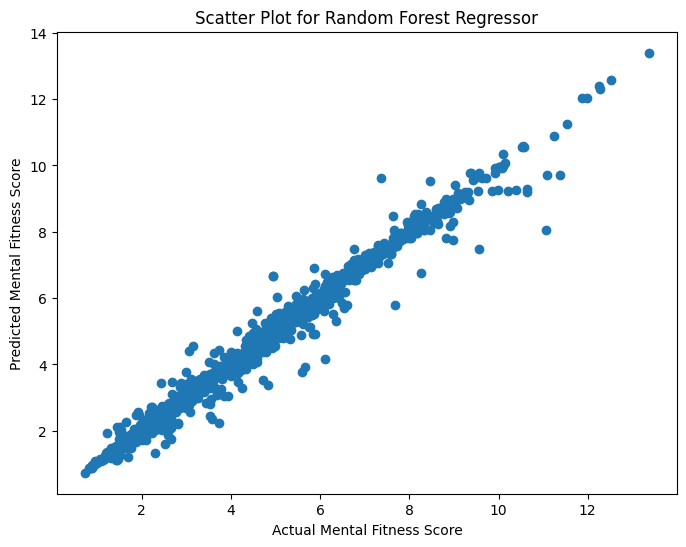

Mean Squared Error (MSE): 0.09686192477179854
R-squared (R2) Score: 0.9809576661956867
Success Rate: 97.953216374269 %
Failure Rate: 2.0467836257309955 %


In [ ]:
# Fit the Random Forest Regressor model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Calculate success rate and failure rate
threshold = 1  # Adjust the threshold as per your requirements
success_rate = np.sum(np.abs(y_test - y_pred) <= threshold) / len(y_test) * 100
failure_rate = 100 - success_rate

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Mental Fitness Score')
plt.ylabel('Predicted Mental Fitness Score')
plt.title('Scatter Plot for Random Forest Regressor')
plt.show()

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Success Rate:", success_rate, "%")
print("Failure Rate:", failure_rate, "%")
